In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, scale
from os import listdir
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 1000) 

Using TensorFlow backend.


In [2]:
'''pd.options.display.max_columns = None
frames = []
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]
def find_soccer_files(dirname):
    filenames = find_csv_filenames(dirname)
    for name in filenames:
        try:
            name = dirname + name
            df = pd.read_csv(name, engine='python')
            #print('The shape is' + str(df.shape) + 'in the file' + name)
            df = (df[['Div', 'HomeTeam', 'AwayTeam',
                    'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
                    'HTR', 'HS', 'AS', 'HST', 'AST',
                    'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']])
            #print('The new shape is' + str(df.shape) + 'in the file' + name)
            frames.append(df)
        except Exception as error:
            print(error)
            
find_soccer_files('eng_premier_league/')
find_soccer_files('eng_championship/')
find_soccer_files('eng_league_1/')
find_soccer_files('eng_league_2/') 
find_soccer_files('eng_conference/')

df1 = pd.concat(frames)
#print(df1.shape)
df1.head()
df1 = df1.dropna(axis=0)
print(df1['Div'].unique())
df1.head() '''

'pd.options.display.max_columns = None\nframes = []\ndef find_csv_filenames( path_to_dir, suffix=".csv" ):\n    filenames = listdir(path_to_dir)\n    return [ filename for filename in filenames if filename.endswith( suffix ) ]\ndef find_soccer_files(dirname):\n    filenames = find_csv_filenames(dirname)\n    for name in filenames:\n        try:\n            name = dirname + name\n            df = pd.read_csv(name, engine=\'python\')\n            #print(\'The shape is\' + str(df.shape) + \'in the file\' + name)\n            df = (df[[\'Div\', \'HomeTeam\', \'AwayTeam\',\n                    \'FTHG\', \'FTAG\', \'FTR\', \'HTHG\', \'HTAG\',\n                    \'HTR\', \'HS\', \'AS\', \'HST\', \'AST\',\n                    \'HF\', \'AF\', \'HC\', \'AC\', \'HY\', \'AY\', \'HR\', \'AR\']])\n            #print(\'The new shape is\' + str(df.shape) + \'in the file\' + name)\n            frames.append(df)\n        except Exception as error:\n            print(error)\n            \nfind_soccer_

In [9]:
'''df1['home_team_chance_to_draw_home_total'] = 0.0
df1['home_team_chance_to_win_home_total'] = 0.0
df1['home_team_chance_to_lose_home_total'] = 0.0
df1['home_team_chance_to_win_agaisnt_away'] = 0.0
df1['home_team_chance_to_draw_agaisnt_away'] = 0.0
df1['home_team_chance_to_lose_agaisnt_away'] = 0.0

for home_team in df1['HomeTeam'].unique():
    home_team_total_ammount_games = df1.loc[df1['HomeTeam'] == home_team]
    if len(home_team_total_ammount_games) == 0:
        continue
    # Chance of Home Team Winning in All Games
    home_team_chance_to_win_total = df1.loc[(df1['HomeTeam'] == home_team) & (df1['FTR'] == 'H')]
    # Percentage of winning chance at home
    home_team_change_to_win_total_percentage = len(home_team_chance_to_win_total) / len(home_team_total_ammount_games)
    # Chance of Home Team Drawing in All Games
    home_team_chance_to_draw_total = df1.loc[(df1['HomeTeam'] == home_team) & (df1['FTR'] == 'D')]
    # Percentage of drawing chance at home
    home_team_change_to_draw_total_percentage = len(home_team_chance_to_draw_total) / len(home_team_total_ammount_games)
    # Chance of Home Team Losing in All Games
    home_team_chance_to_lose_total = df1.loc[(df1['HomeTeam'] == home_team) & (df1['FTR'] == 'A')]
    # Percentage of losing chance at home
    home_team_change_to_lose_total_percentage = len(home_team_chance_to_lose_total) / len(home_team_total_ammount_games)
    df1.loc[df1['HomeTeam'] == home_team, ['home_team_chance_to_win_home_total']] = home_team_change_to_win_total_percentage
    df1.loc[df1['HomeTeam'] == home_team, ['home_team_chance_to_lose_home_total']] = home_team_change_to_lose_total_percentage
    df1.loc[df1['HomeTeam'] == home_team, ['home_team_chance_to_draw_home_total']] = home_team_change_to_draw_total_percentage
    for away_team in df1['AwayTeam'].unique():
        
        # Chance of Home Team Play agaisn't away
        home_team_chance_to_play_away = df1.loc[(df1['HomeTeam'] == home_team) & (df1['AwayTeam'] == away_team)]
        if len(home_team_chance_to_play_away) == 0:
            continue
        # Chance of Home Team win agaisn't away
        home_team_chance_to_win_away = df1.loc[(df1['HomeTeam'] == home_team) & (df1['AwayTeam'] == away_team) & (df1['FTR'] == 'H')]
        
        # Chance of Home Team draw agaisn't away
        home_team_chance_to_draw_away = df1.loc[(df1['HomeTeam'] == home_team) & (df1['AwayTeam'] == away_team) & (df1['FTR'] == 'D')]
        
        # Chance of Home Team lose agaisn't away
        home_team_chance_to_lose_away = df1.loc[(df1['HomeTeam'] == home_team) & (df1['AwayTeam'] == away_team) & (df1['FTR'] == 'A')]
        
        # Percentage of Home Team change to win agaisn't away
        home_team_chance_to_win_away_percentage = len(home_team_chance_to_win_away)/len(home_team_chance_to_play_away)
        #print('Chance of home team: ', home_team, " winning agaisn't away: ", away_team, ' are: ', str(home_team_chance_to_win_away_percentage))
        
        # Percentage of Home Team change to win agaisn't away
        home_team_chance_to_lose_away_percentage = len(home_team_chance_to_lose_away)/len(home_team_chance_to_play_away)
        #print('Chance of home team: ', home_team, " losing agaisn't away: ", away_team, ' are: ', str(home_team_chance_to_lose_away_percentage))
        
        # Percentage of Home Team change to win agaisn't away
        home_team_chance_to_draw_away_percentage = len(home_team_chance_to_draw_away)/len(home_team_chance_to_play_away)
        #print('Chance of home team: ', home_team, " drawing agaisn't away: ", away_team, ' are: ', str(home_team_chance_to_draw_away_percentage))
        df1.loc[(df1['HomeTeam'] == home_team) & (df1['AwayTeam'] == away_team), ['home_team_chance_to_win_agaisnt_away']] = home_team_chance_to_win_away_percentage
        df1.loc[(df1['HomeTeam'] == home_team) & (df1['AwayTeam'] == away_team), ['home_team_chance_to_lose_agaisnt_away']] = home_team_chance_to_lose_away_percentage
        df1.loc[(df1['HomeTeam'] == home_team) & (df1['AwayTeam'] == away_team), ['home_team_chance_to_draw_agaisnt_away']] = home_team_chance_to_draw_away_percentage
df1.to_csv('optimized_data.csv', sep=',')
    '''


'df1[\'home_team_chance_to_draw_home_total\'] = 0.0\ndf1[\'home_team_chance_to_win_home_total\'] = 0.0\ndf1[\'home_team_chance_to_lose_home_total\'] = 0.0\ndf1[\'home_team_chance_to_win_agaisnt_away\'] = 0.0\ndf1[\'home_team_chance_to_draw_agaisnt_away\'] = 0.0\ndf1[\'home_team_chance_to_lose_agaisnt_away\'] = 0.0\n\nfor home_team in df1[\'HomeTeam\'].unique():\n    home_team_total_ammount_games = df1.loc[df1[\'HomeTeam\'] == home_team]\n    if len(home_team_total_ammount_games) == 0:\n        continue\n    # Chance of Home Team Winning in All Games\n    home_team_chance_to_win_total = df1.loc[(df1[\'HomeTeam\'] == home_team) & (df1[\'FTR\'] == \'H\')]\n    # Percentage of winning chance at home\n    home_team_change_to_win_total_percentage = len(home_team_chance_to_win_total) / len(home_team_total_ammount_games)\n    # Chance of Home Team Drawing in All Games\n    home_team_chance_to_draw_total = df1.loc[(df1[\'HomeTeam\'] == home_team) & (df1[\'FTR\'] == \'D\')]\n    # Percentage of 

In [6]:
df1 = pd.read_csv('optimized_data.csv')
games = df1

games['HTR'] = games['HTR'].replace('H', 2).replace('D', 1).replace('A', 0)
games['FTR'] = games['FTR'].replace('H', 2).replace('D', 1).replace('A', 0)
i = 1
for home_team in games['HomeTeam'].unique():
    
    games.loc[(games['AwayTeam'] == home_team), ['AwayTeam']] = i
    games.loc[(games['HomeTeam'] == home_team), ['HomeTeam']] = i

    #print('Team ' + str(home_team) + ' is equivalent to ' + str(i))
    i += 1


results = games['HTR']

#games = games.drop(['HTR'], axis=1)





In [7]:
i = 1

for division in games['Div'].unique():
    
    games.loc[(games['Div'] == division), ['Div']] = i
    i = i + 1


In [10]:
print(len(games))
games.head(15)

32401


,Unnamed: 0,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HY,AY,HR,AR,home_team_chance_to_draw_home_total,home_team_chance_to_win_home_total,home_team_chance_to_lose_home_total,home_team_chance_to_win_agaisnt_away,home_team_chance_to_draw_agaisnt_away,home_team_chance_to_lose_agaisnt_away
0,0,1,1,19,2.0,2.0,1,2.0,2.0,1,...,0.0,2.0,0.0,0.0,0.321569,0.368627,0.309804,0.500000,0.250000,0.250000
1,1,1,2,15,0.0,2.0,0,0.0,1.0,0,...,3.0,1.0,0.0,0.0,0.255061,0.522267,0.222672,0.307692,0.230769,0.461538
2,2,1,3,11,0.0,0.0,1,0.0,0.0,1,...,1.0,2.0,0.0,0.0,0.243346,0.444867,0.311787,0.375000,0.375000,0.250000
3,3,1,4,18,0.0,0.0,1,0.0,0.0,1,...,2.0,3.0,0.0,0.0,0.157895,0.668016,0.174089,0.900000,0.100000,0.000000
4,4,1,5,14,0.0,0.0,1,0.0,0.0,1,...,2.0,3.0,1.0,0.0,0.279570,0.458781,0.261649,0.200000,0.600000,0.200000
5,5,1,6,17,0.0,2.0,0,0.0,1.0,0,...,0.0,2.0,0.0,0.0,0.254480,0.419355,0.326165,0.200000,0.200000,0.600000
6,6,1,7,13,1.0,3.0,0,1.0,1.0,1,...,2.0,0.0,0.0,1.0,0.274510,0.313725,0.411765,0.000000,0.000000,1.000000
7,7,1,8,12,3.0,1.0,2,0.0,1.0,0,...,0.0,1.0,0.0,1.0,0.247012,0.414343,0.338645,0.666667,0.333333,0.000000
8,8,1,9,16,2.0,0.0,2,0.0,0.0,1,...,0.0,1.0,0.0,1.0,0.214575,0.672065,0.113360,0.818182,0.090909,0.090909
9,9,1,10,20,0.0,1.0,0,0.0,0.0,1,...,1.0,0.0,0.0,0.0,0.307116,0.355805,0.337079,0.125000,0.125000,0.750000


In [11]:
print('Correlation between Half Time Result and Away Red Cards')
print(np.corrcoef(games['HTR'], games['AR']))
print('Correlation between Full Time Result and Away Red Cards')
print(np.corrcoef(games['FTHG'], games['HR']))
print(np.corrcoef(games['HTR'], games['FTR']))
chance_win = ([games['FTR'] == games['HTR']])
a = np.array(chance_win, dtype=np.int)
chance_win = np.sum(a)
print(chance_win / 32401)

Correlation between Half Time Result and Away Red Cards
[[ 1.          0.04728487]
 [ 0.04728487  1.        ]]
Correlation between Full Time Result and Away Red Cards
[[ 1.         -0.06492051]
 [-0.06492051  1.        ]]
[[ 1.          0.57792276]
 [ 0.57792276  1.        ]]
0.588160859233


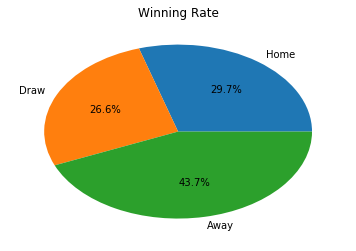

In [12]:
win_home = np.sum(games['FTR'] == 0)
draw = np.sum(games['FTR'] == 1)
win_away = np.sum(games['FTR'] == 2)
results_pie = [win_home, draw, win_away]
labels = ['Home', 'Draw', 'Away']
plt.title('Winning Rate')
plt.pie(results_pie, labels=labels, autopct='%1.1f%%')
plt.show()

In [13]:
X = games.drop(['FTHG', 'FTAG'], axis=1)

Y = games[['FTHG', 'FTAG']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train = scale(X_train)
y_train = scale(y_train)
X_test = scale(X_test)
y_test = scale(y_test)
print(X_train.shape)
print(y_train.shape)

(22680, 26)
(22680, 2)


In [14]:
model = Sequential()

In [15]:
model.add(Dense(800, activation='relu', input_shape=(25,)))
model.add(Dropout(0.5))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               20800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               96120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 242       
Total params: 117,162
Trainable params: 117,162
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train,batch_size=4000, epochs=500,verbose=2, validation_data=(X_test, y_test))

ValueError: Error when checking input: expected dense_1_input to have shape (25,) but got array with shape (26,)

In [19]:
scores = model.evaluate(X_test, y_test, verbose=2)

ValueError: Error when checking input: expected dense_1_input to have shape (25,) but got array with shape (26,)

In [20]:
print('Test Loss:', scores[0])
print('Test Accuracy', scores[1])

NameError: name 'scores' is not defined

Test Loss: 0.914881914449
Test Accuracy 0.990355107409


In [ ]:
#prediction = model.predict()
#print(prediction)